# 전국 신규 민간 아파트 분양가격 동향

2013년부터 최근까지 부동산 가격 변동 추세가 아파트 분양가에도 반영될까요? 공공데이터 포털에 있는 데이터를 Pandas 의 melt, concat, pivot, transpose 와 같은 reshape 기능을 활용해 분석해 봅니다. 그리고 groupby, pivot_table, info, describe, value_counts 등을 통한 데이터 요약과 분석을 해봅니다. 이를 통해 전혀 다른 형태의 두 데이터를 가져와 정제하고 병합하는 과정을 다루는 방법을 알게 됩니다. 전처리 한 결과에 대해 수치형, 범주형 데이터의 차이를 이해하고 다양한 그래프로 시각화를 할 수 있게 됩니다.


## 다루는 내용
* 공공데이터를 활용해 전혀 다른 두 개의 데이터를 가져와서 전처리 하고 병합하기
* 수치형 데이터와 범주형 데이터를 바라보는 시각을 기르기
* 데이터의 형식에 따른 다양한 시각화 방법 이해하기

## 실습
* 공공데이터 다운로드 후 주피터 노트북으로 로드하기
* 판다스를 통해 데이터를 요약하고 분석하기
* 데이터 전처리와 병합하기
* 수치형 데이터와 범주형 데이터 다루기
* 막대그래프(bar plot), 선그래프(line plot), 산포도(scatter plot), 상관관계(lm plot), 히트맵, 상자수염그림, swarm plot, 도수분포표, 히스토그램 실습하기

## 데이터셋
* 다운로드 위치 : https://www.data.go.kr/dataset/3035522/fileData.do

### 전국 평균 분양가격(2013년 9월부터 2015년 8월까지)
* 전국 공동주택의 3.3제곱미터당 평균분양가격 데이터를 제공

###  주택도시보증공사_전국 평균 분양가격(2019년 12월)
* 전국 공동주택의 연도별, 월별, 전용면적별 제곱미터당 평균분양가격 데이터를 제공
* 지역별 평균값은 단순 산술평균값이 아닌 가중평균값임

In [1]:
# 파이썬에서 쓸 수 있는 엑셀과도 유사한 판다스 라이브러리를 불러옵니다.
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

# 1. 데이터 시각화 스타일.폰트 설정

### 시각화 스타일 설정
* 일부 스타일은 폰트 설정을 초기화 하기 때문에 style 설정 시 폰트 설정이 초기화 되지 않도록 폰트 설정 위에 지정해 주세요.★
* matplotlib plot 스타일 지정 시 
```python
print(plt.style.available)
plt.style.use('fivethirtyeight')
```
* seaborn plot 스타일 지정 시
```python
sns.set_style(docsrting 확인)
```

In [2]:
# seaborn plot 스타일 지정 시
# sns.set_style(docstring)
# docstring 으로 보면 지정 할 수 있는 스타일들이 나온다.

In [3]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [4]:
# matplotlib에서 plot 스타일 지정 시
plt.style.use('seaborn-whitegrid')

### 폰트설정
* 다양한 라이브러리들은 해외에서 만든거기 때문에 한글 폰트 지원 잘 안되어 한글폰트가 깨기게 된다.
* 아래 코드로 한글 폰트와 마이너스 값이 정상 출력되도록 한다.
```python
plt.rc("font", family= "Malgun Gothic") # 윈도우에서 한글폰트가 깨지지 않게 하기 위한 설정
plt.rc("axes", unicode_minus = False  # '-' 값이 깨지지 않게 하기 위한 설정 
```

In [5]:
# 윈도우 : "Malgun Gothic"
# 맥 : "AppleGothic"

plt.rc("font", family= "Malgun Gothic") #  윈도우에서 한글폰트 깨지지 않게 하기 위한 설정
plt.rc("axes", unicode_minus= False)  #  '-' 값이 깨지지 않게 하기 위한 설정 

<AxesSubplot:title={'center':'한글'}>

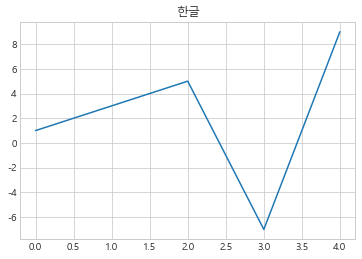

In [6]:
# 폰드 안깨지는지 확인하기
pd.Series([1,3,5,-7,9]).plot(title='한글')

# 2. 데이터 로드

## 파일 목록을 불러오는 기능 
* import os 랑 os.walk 정도는 외우고 도움말 docstring을 보면 된다.
* docstring :  Shift + Tab + Tab 을 하게 되면 팝업창을 키울 수 있습니다.

In [25]:
import os
# os.walk( docstring 볼것 !)

for root, dirs, files in os.walk('data'):
    print(files)
    
# 프린트 되어진 목록을 보고 데이터 로드 시 복붙 하면 된다. 

['Online Retail.xlsx', 'pandas.csv', 'seoul-covid19-2021-01-03.csv', 'seoul-covid19-2021-06-14.csv', '전국 평균 분양가격(2013년 9월부터 2015년 8월까지).csv', '주택도시보증공사_전국 평균 분양가격(2019년 12월).csv']


## 첫번째 데이터 로드(df_last)
공공데이터 포털에서 "주택도시보증공사_전국 평균 분양가격"파일을 다운로드 받아 불러옵니다.
이 때, 인코딩을 설정을 해주어야 한글이 깨지지 않습니다.
보통 엑셀로 저장된 한글의 인코딩은 cp949 혹은 euc-kr로 되어 있습니다.
df_last 라는 변수에 최근 분양가 파일을 다운로드 받아 로드합니다.
* cp949가 euc-kr 보다 더 많은 한글 인코딩을 제공하기 때문에 cp949를 더 추천합니다.
* cp949 는 11172개의 한글 인코딩 제공

데이터를 로드한 뒤 shape를 통해 행과 열의 갯수를 출력합니다.

In [26]:
# 최근 분양가 파일을 로드해서 df_last 라는 변수에 담습니다.
# 파일로드 시 OSError가 발생한다면, engine="python"을 추가해 보세요.
# 윈도우에서 파일탐색기의 경로를 복사해서 붙여넣기 했는데도 파일을 불러올 수 없다면
# 아마도 경로에 있는 ₩ 역슬래시 표시를 못 읽어왔을 가능성이 큽니다. 
# r"경로명" 으로 적어주세요.
# r"경로명"으로 적게 되면 경로를 문자 그대로(raw) 읽으라는 의미입니다.
# cp949 는 한글 11172 폰트를 제공함 

df_last = pd.read_csv('data/주택도시보증공사_전국 평균 분양가격(2019년 12월).csv', encoding= 'cp949')
df_last.shape

(4335, 5)

In [27]:
# head 로 파일을 미리보기 합니다.
df_last.head(3)

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882


In [28]:
# tail 로도 미리보기를 합니다.
df_last.tail(3)

,지역명,규모구분,연도,월,분양가격(㎡)
4332,제주,전용면적 60㎡초과 85㎡이하,2019,12,3898
4333,제주,전용면적 85㎡초과 102㎡이하,2019,12,NaN
4334,제주,전용면적 102㎡초과,2019,12,3601


## 두번째 데이터 로드(df_first)
전국 평균 분양가격(2013년 9월부터 2015년 8월까지) 파일을 불러옵니다.
df_first 라는 변수에 담고 shape로 행과 열의 갯수를 출력합니다.

In [10]:
import os 

# os.walk( docstring에 나와 있음)
for root, dirs, files in os.walk('data'):
    print(files)

['Online Retail.xlsx', 'pandas.csv', 'seoul-covid19-2021-01-03.csv', 'seoul-covid19-2021-06-14.csv', '전국 평균 분양가격(2013년 9월부터 2015년 8월까지).csv', '주택도시보증공사_전국 평균 분양가격(2019년 12월).csv']


In [29]:
# 해당되는 폴더 혹은 경로의 파일 목록을 출력해 줍니다.
df_first = pd.read_csv('data/전국 평균 분양가격(2013년 9월부터 2015년 8월까지).csv', encoding= 'cp949')
df_first.shape

(17, 22)

In [13]:
# df_first 변수에 담긴 데이터프레임을 head로 미리보기 합니다.
df_first.head(3)

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,...,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,...,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795


In [14]:
# df_first 변수에 담긴 데이터프레임을 tail로 미리보기 합니다.
df_first.tail(3)

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
14,경북,6168,6168,6234,6317,6412,6409,6554,6556,6563,...,6881,6989,6992,6953,6997,7006,6966,6887,7035,7037
15,경남,6473,6485,6502,6610,6599,6610,6615,6613,6606,...,7125,7332,7592,7588,7668,7683,7717,7715,7723,7665
16,제주,7674,7900,7900,7900,7900,7900,7914,7914,7914,...,7724,7739,7739,7739,7826,7285,7285,7343,7343,7343


# **3. [df_last 데이터 ] 보기**

# 전처리

## 데이터 확인하기
* 요약, 인포 등 

In [30]:
# info 로 요약합니다.
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역명      4335 non-null   object
 1   규모구분     4335 non-null   object
 2   연도       4335 non-null   int64 
 3   월        4335 non-null   int64 
 4   분양가격(㎡)  4058 non-null   object
dtypes: int64(2), object(3)
memory usage: 169.5+ KB


In [31]:
df_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   지역        17 non-null     object
 1   2013년12월  17 non-null     int64 
 2   2014년1월   17 non-null     int64 
 3   2014년2월   17 non-null     int64 
 4   2014년3월   17 non-null     int64 
 5   2014년4월   17 non-null     int64 
 6   2014년5월   17 non-null     int64 
 7   2014년6월   17 non-null     int64 
 8   2014년7월   17 non-null     int64 
 9   2014년8월   17 non-null     int64 
 10  2014년9월   17 non-null     int64 
 11  2014년10월  17 non-null     int64 
 12  2014년11월  17 non-null     int64 
 13  2014년12월  17 non-null     int64 
 14  2015년1월   17 non-null     int64 
 15  2015년2월   17 non-null     int64 
 16  2015년3월   17 non-null     int64 
 17  2015년4월   17 non-null     int64 
 18  2015년5월   17 non-null     int64 
 19  2015년6월   17 non-null     int64 
 20  2015년7월   17 non-null     int64 
 21  2015년8월   17 non-n

## 결측치 보기

isnull 통해 데이터가 비어있는지를 확인할 수 있습니다.
결측치는 True로 표시되는데, True == 1 이기 때문에 이 값을 다 더해주면 결측치의 수가 됩니다.

* 왜 결측치가 발생했을까 생각해 볼것

In [34]:
# isnull 을 통해 결측치를 봅니다.
df_last.isnull().sum()

# 결측치가 있는데 왜 결측치가 있는지 알려면 그 도메인 지식이 있어야 한다.  ( 왜 결측치 가있을까?)
# 지방으로 갈수록 분양이 안될 가능성 있음(인구부족) -> 분양이 안됬기 때문에 결측치가 있을 수 있겠구나

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    277
dtype: int64

In [35]:
df_first.isnull().sum()

지역          0
2013년12월    0
2014년1월     0
2014년2월     0
2014년3월     0
2014년4월     0
2014년5월     0
2014년6월     0
2014년7월     0
2014년8월     0
2014년9월     0
2014년10월    0
2014년11월    0
2014년12월    0
2015년1월     0
2015년2월     0
2015년3월     0
2015년4월     0
2015년5월     0
2015년6월     0
2015년7월     0
2015년8월     0
dtype: int64

## 분양가격(제곱미터)를 평당 분양가 로 바꾸기
* df_last 와 df_first 의 단의가 다름을 확인할 수 있다. 
* df_last는 제곱미터 이고 df_first 는 평당 가격임
* 제곱미터 당 분양가 데이터타입이 object 임을 확인

### 데이터 타입 변경
* 분양가격이 object(문자) 타입으로 되어 있습니다. 
* 문자열 타입을 계산할 수 없기 때문에 수치 데이터로 변경해 줍니다.
* .astype(int) or astype(float)으로 타입이 변경이 안되는 것을 확인할 수 있다.
(이유: 결측치가 섞여 있을 때 변환이 제대로 되지 않습니다.)
* 그래서 pd.to_numeric 을 통해 error 발생 무시를 통해 데이터의 타입을 변경합니다.

In [41]:
# df_last['분양가격(㎡)'].astype(int) -> 에러 발생
# df_last['분양가격(㎡)'].astype(float) -> 에러 발생 


pd.to_numeric(df_last['분양가격(㎡)'])

# error 발생 
# ValueError : Unable to parse string "  "  => 눈에 보이지 않는 공백이 있다는 뜻 
# 판다스 입장에서는 공백도 의미있는 데이터로 판단을 한다.
# 이거 무시하고 숫자형으로 바꾸게 될 시 결측치로 반환 하므로 그 전에 에러로 경고 줌
# ()안에 errors='coerce'(뜻: 강압) 넣어주면 무시하고 강제로 바꿔서 프린트 해줌
# 공백 값은 결측치 처리가 된다.

ValueError: Unable to parse string "  " at position 28

In [43]:
# ()안에 errors='coerce'(뜻: 강압) 넣어주면 무시하고 강제로 바꿔서 프린트 해줌
# docstring 보면 됨 

df_last['분양가격'] = pd.to_numeric(df_last['분양가격(㎡)'], errors='coerce')
df_last['분양가격'].head(3)

0    5841.0
1    5652.0
2    5882.0
Name: 분양가격, dtype: float64

### 평당분양가격 구하기
공공데이터포털에 올라와 있는 2013년부터의 데이터는 평당분양가격 기준으로 되어 있습니다.
분양가격을 평당기준으로 보기위해 3.3을 곱해서 "평당분양가격" 컬럼을 만들어 추가해 줍니다.

In [45]:
df_last['평당분양가격'] = df_last['분양가격'] * 3.3 
df_last.head(1)

,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격
0,서울,전체,2015,10,5841,5841.0,19275.3


### 분양가격 요약하기

In [51]:
# info를 통해 분양가격을 봅니다.
print(df_last.isnull().sum())
print('------------------')
df_last.info()

# => 결측치가 277에서 378개로 많아진것을 확인 할 수가 있다. (강제로 바꿈으로써 공백행이 결측치로 바뀌었다.)
# => 밑에 보면 4058 에서 3957로 데이터가 적어진 것을 확인할 수 있다. 
# => 이거 보고 아 생각보다 공백이었던 데이터들이 많구나 알 수 있음

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    277
분양가격       378
평당분양가격     378
dtype: int64
------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지역명      4335 non-null   object 
 1   규모구분     4335 non-null   object 
 2   연도       4335 non-null   int64  
 3   월        4335 non-null   int64  
 4   분양가격(㎡)  4058 non-null   object 
 5   분양가격     3957 non-null   float64
 6   평당분양가격   3957 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 237.2+ KB


In [52]:
# 변경 전 컬럼인 분양가격(㎡) 컬럼을 요약합니다.
df_last['분양가격(㎡)'].describe()
# => 문자형이기 때문에 아래와 같은 요약

count     4058
unique    1753
top       2221
freq        17
Name: 분양가격(㎡), dtype: object

In [53]:
# 수치데이터로 변경된 분양가격 컬럼을 요약합니다.
df_last['평당분양가격'].describe()

count     3957.000000
mean     10685.824488
std       4172.222780
min       6164.400000
25%       8055.300000
50%       9484.200000
75%      11751.300000
max      42002.400000
Name: 평당분양가격, dtype: float64

## 규모구분을 전용면적 컬럼으로 변경
규모구분 컬럼은 전용면적에 대한 내용이 있습니다. 전용면적이라는 문구가 공통적으로 들어가고 규모구분보다는 전용면적이 좀 더 직관적이기 때문에 전용면적이라는 컬럼을 새로 만들어주고 기존 규모구분의 값에서 전용면적, 초과, 이하 등의 문구를 빼고 간결하게 만들어 봅니다.

이 때 str 의 replace 기능을 사용해서 예를들면 "전용면적 60㎡초과 85㎡이하"라면 "60㎡~85㎡" 로 변경해 줍니다.

* pandas 의 string-handling 기능을 좀 더 보고 싶다면 :
https://pandas.pydata.org/pandas-docs/stable/reference/series.html#string-handling

In [55]:
df_last.head(1)

,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격
0,서울,전체,2015,10,5841,5841.0,19275.3


In [56]:
# 규모구분의 unique 값 보기
df_last['규모구분'].nunique

# 전용면적 용어가 반복이 된다. 
# 전용면적이라는 컬럼을 만들어서 넣어주어도 되겠다고 판단
# 전용면적 문자를 삭제하여 메모리 줄이기 (빅데이터일 수록 메모리 줄이는 것이 좋음)

<bound method IndexOpsMixin.nunique of 0                      전체
1              전용면적 60㎡이하
2        전용면적 60㎡초과 85㎡이하
3       전용면적 85㎡초과 102㎡이하
4             전용면적 102㎡초과
              ...        
4330                   전체
4331           전용면적 60㎡이하
4332     전용면적 60㎡초과 85㎡이하
4333    전용면적 85㎡초과 102㎡이하
4334          전용면적 102㎡초과
Name: 규모구분, Length: 4335, dtype: object>

In [58]:
# df_last['규모구분'].replace('전용면적','') 로 하지 않는 이유 :

# replace : 전체가 일치해야 replace 됨
# str.replace : 일부만 일치해도 replace 됨

In [57]:
# 규모구분을 전용면적으로 변경하기

df_last['전용면적'] = df_last['규모구분'].str.replace('전용면적','')
df_last['전용면적'] = df_last['전용면적'].str.replace('초과','~')
df_last['전용면적'] = df_last['전용면적'].str.replace('이하','')
df_last['전용면적'] = df_last['전용면적'].str.replace(' ','')
df_last['전용면적']

0             전체
1            60㎡
2        60㎡~85㎡
3       85㎡~102㎡
4          102㎡~
          ...   
4330          전체
4331         60㎡
4332     60㎡~85㎡
4333    85㎡~102㎡
4334       102㎡~
Name: 전용면적, Length: 4335, dtype: object

## 필요없는 컬럼 제거하기
* drop을 통해 전처리 해준 컬럼을 제거합니다. 
* 메모리 사용량이 줄어들었는지 확인합니다.

In [59]:
# info로 정보 보기
print(df_last.info())

# => memory rk 271.1 KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지역명      4335 non-null   object 
 1   규모구분     4335 non-null   object 
 2   연도       4335 non-null   int64  
 3   월        4335 non-null   int64  
 4   분양가격(㎡)  4058 non-null   object 
 5   분양가격     3957 non-null   float64
 6   평당분양가격   3957 non-null   float64
 7   전용면적     4335 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 271.1+ KB
None


,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격,전용면적
0,서울,전체,2015,10,5841,5841.0,19275.3,전체


In [60]:
# drop 사용시 axis에 유의 합니다.
# axis 0:행, 1:열

df_last = df_last.drop( ['분양가격(㎡)', '분양가격'], axis = 1)

In [61]:
# 제거가 잘 되었는지 확인 합니다.

df_last.head(1)

,지역명,규모구분,연도,월,평당분양가격,전용면적
0,서울,전체,2015,10,19275.3,전체


In [62]:
# 컬럼 제거를 통해 메모리 사용량이 줄어들었는지 확인합니다.

df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역명     4335 non-null   object 
 1   규모구분    4335 non-null   object 
 2   연도      4335 non-null   int64  
 3   월       4335 non-null   int64  
 4   평당분양가격  3957 non-null   float64
 5   전용면적    4335 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 203.3+ KB


# 집계 및 시각화 하기

## Pandas 시각화

### 수치형 데이터의 히스토그램 

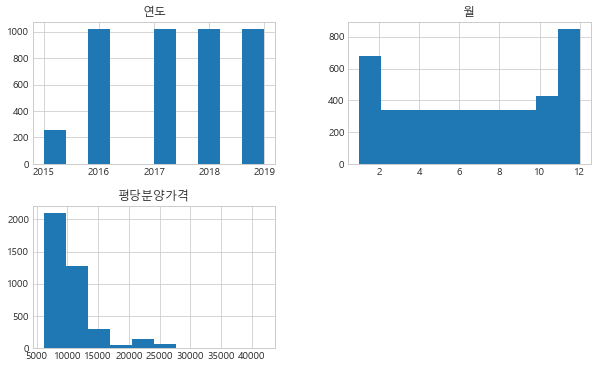

In [142]:
# df.hist()

_=df_last.hist(figsize = (10,6))

# 연도 보면 2015년도 데이터는 일부만 있기 때문에 적게 나옴

## groupby 로 데이터 집계하기
groupby 를 통해 데이터를 그룹화해서 연산을 해봅니다.
* 한개의 변수(열)로 groupby 해서 plot 시각화 하면 그 변수가 x 축으로 오게해서 그려지는구나! 
* 2개 이상의 변수(열)로 group by 해서, method chaining 으로 .unstack() 해주면 그룹화해준 마지막 변수(열)을 열로 빼줌
* unstack 된 열이 시각화 해보면 범주로 따로 빼져서 깔끔하게 그려짐

In [64]:
df_last.head(1)

,지역명,규모구분,연도,월,평당분양가격,전용면적
0,서울,전체,2015,10,19275.3,전체


###  1개의 변수: 지역별 평당 평균 분앙가

<AxesSubplot:title={'center':'지역별 평당 분양가'}, xlabel='지역명'>

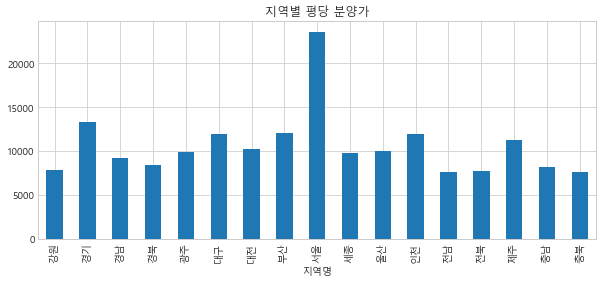

In [70]:
# 지역명으로 평당분양가격의 평균을 구하고 막대그래프(bar)로 시각화 합니다.
# df.groupby(["인덱스로 사용할 컬럼명"])["계산할 컬럼 값"].연산()

mean_price = df_last.groupby('지역명')['평당분양가격'].mean()
mean_price.plot.bar(figsize=(10,4), title= '지역별 평당 분양가')

<AxesSubplot:title={'center':'지역별 평당 분양가격'}, xlabel='지역명'>

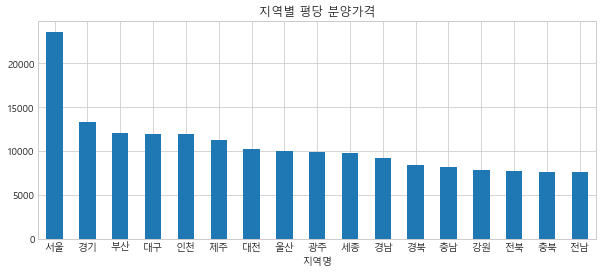

In [72]:
mean_price = df_last.groupby(['지역명'])['평당분양가격'].mean().sort_values(ascending=False)
mean_price.plot.bar(rot=0, figsize=(10,4), title="지역별 평당 분양가격")

###  1개의 변수:전용면적 별 평균 평당분양가

In [73]:
df_last.head(1)

,지역명,규모구분,연도,월,평당분양가격,전용면적
0,서울,전체,2015,10,19275.3,전체


<AxesSubplot:title={'center':'전용면적 별 평당분양가격'}, xlabel='전용면적'>

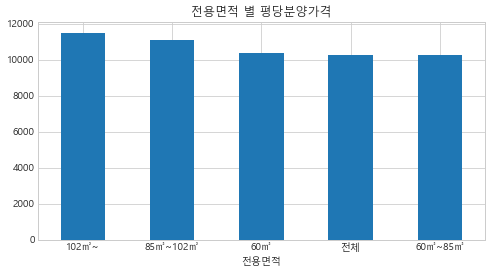

In [76]:
# 전용면적으로 평당분양가격의 평균을 구합니다.
mean_price_space = df_last.groupby('전용면적')['평당분양가격'].mean().sort_values(ascending =False)
mean_price_space.plot.bar(figsize = (8,4), title='전용면적 별 평당분양가격', rot=0)

### 2개의 변수:지역별, 전용면적 당 평균 평당분양가격

<AxesSubplot:xlabel='지역명,전용면적'>

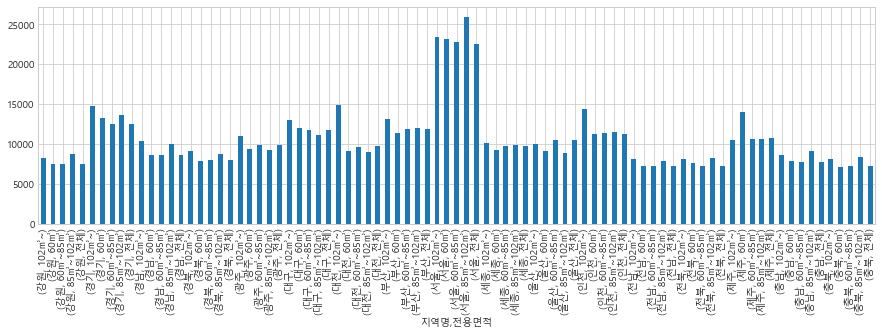

In [78]:
# unstack 적용 전 
mean_test = df_last.groupby(['지역명','전용면적'])['평당분양가격'].mean()
mean_test.plot.bar(figsize = (15,4))

<AxesSubplot:xlabel='지역명'>

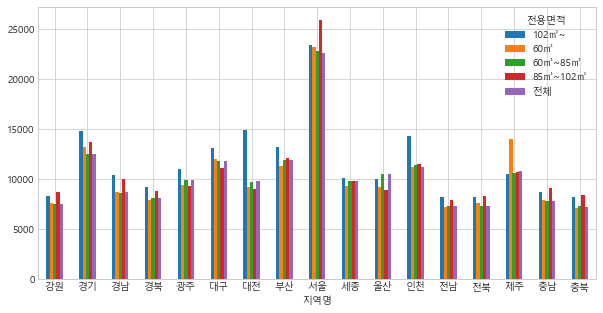

In [88]:
# 지역명, 전용면적으로 평당분양가격의 평균을 구합니다.
# place_space_price

place_space_price = df_last.groupby(['지역명', '전용면적'])['평당분양가격'].mean().unstack()
place_space_price.plot.bar(rot=0, figsize=(10,5))

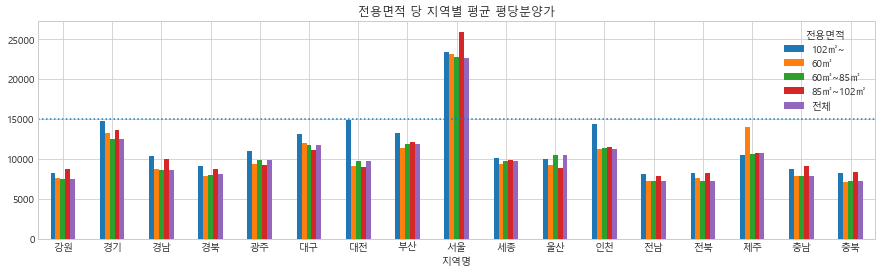

In [92]:
place_space_price.plot.bar(rot=0, figsize = (15,4), title='전용면적 당 지역별 평균 평당분양가')
plt.axhline(15000, linestyle=':')

### 2개의 변수:연도와 지역별 평균 평당분양가격

<AxesSubplot:xlabel='연도'>

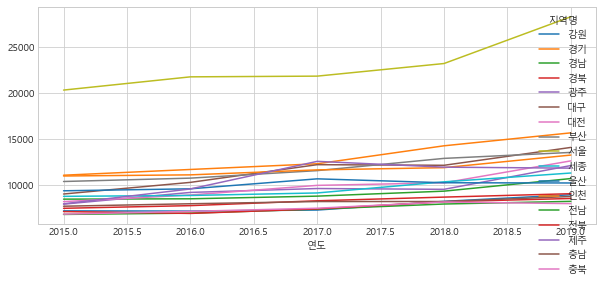

In [93]:
mean_year_place = df_last.groupby(['연도', '지역명'])['평당분양가격'].mean().unstack()
mean_year_place.plot(figsize = (10,4))

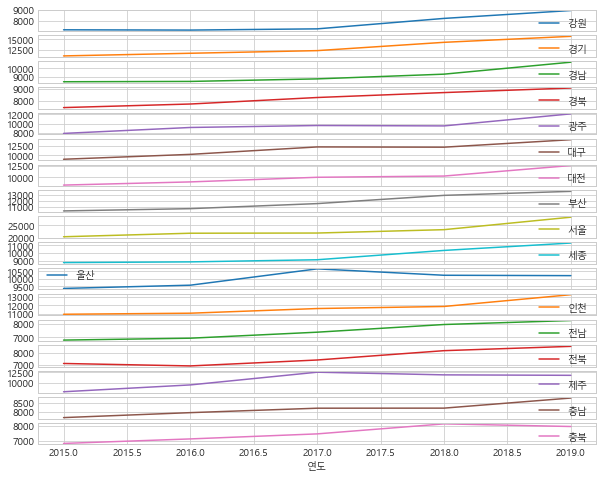

In [95]:
_=mean_year_place.plot(figsize = (10,8), subplots=True)

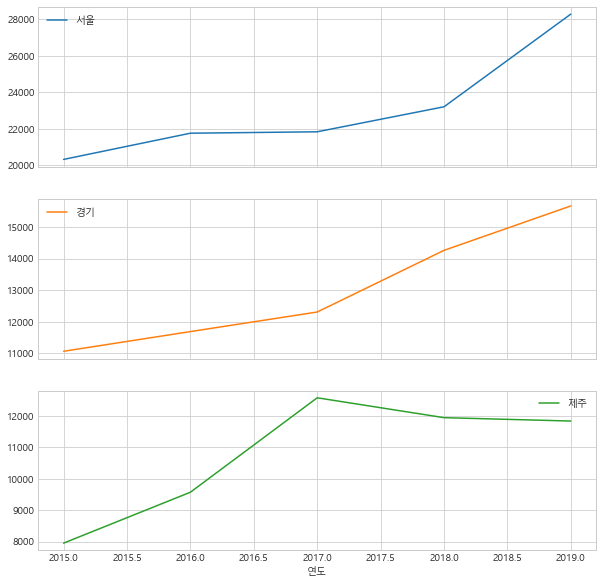

In [97]:
# 특정 지역만 서브플롯 그리기
_=mean_year_place[['서울','경기','제주']].plot(subplots=True, figsize=(10,10))

## pivot table 로 데이터 집계하기
* groupby 로 했던 작업을 pivot_table로 똑같이 해봅니다.

### 1개의 변수:지역별 평균 평당분양가격

<AxesSubplot:xlabel='지역명'>

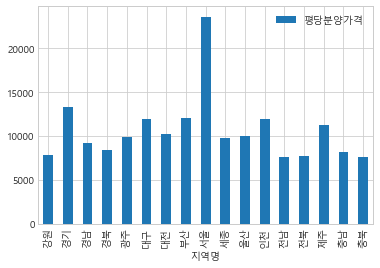

In [105]:
# 지역명을 index 로 평당분양가격 을 values 로 구합니다.
p = pd.pivot_table(data= df_last, index = '지역명', values = '평당분양가격')
p.plot.bar()

###  1개의 변수:전용면적별 평균 평당분양가격

In [106]:
# 전용면적을 index 로 평당분양가격 을 values 로 구합니다.
pd.pivot_table(data=df_last, index = '전용면적', values='평당분양가격')

,평당분양가격
전용면적,
102㎡~,11517.705634
60㎡,10375.137421
60㎡~85㎡,10271.040071
85㎡~102㎡,11097.599573
전체,10276.086207


### 2개의 변수: 지역명,전용면적 당 평당분양가격

In [108]:
# 지역명, 전용면적으로 평당분양가격의 평균을 구합니다.
df_last.groupby(["전용면적", "지역명"])["평당분양가격"].mean().unstack().round()

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
전용면적,,,,,,,,,,,,,,,,,
102㎡~,8311.0,14772.0,10358.0,9157.0,11042.0,13087.0,14877.0,13208.0,23446.0,10107.0,9974.0,14362.0,8168.0,8194.0,10523.0,8689.0,8195.0
60㎡,7567.0,13252.0,8689.0,7883.0,9431.0,11992.0,9176.0,11354.0,23213.0,9324.0,9202.0,11241.0,7210.0,7610.0,14022.0,7911.0,7103.0
60㎡~85㎡,7486.0,12524.0,8619.0,8061.0,9911.0,11779.0,9711.0,11865.0,22787.0,9775.0,10503.0,11384.0,7269.0,7271.0,10621.0,7819.0,7264.0
85㎡~102㎡,8750.0,13678.0,10018.0,8774.0,9296.0,11141.0,9037.0,12073.0,25944.0,9848.0,8861.0,11528.0,7909.0,8276.0,10709.0,9120.0,8391.0
전체,7478.0,12560.0,8659.0,8079.0,9904.0,11771.0,9786.0,11936.0,22610.0,9805.0,10493.0,11257.0,7284.0,7293.0,10785.0,7815.0,7219.0


In [110]:
pd.pivot_table(data=df_last, index = '전용면적', columns= '지역명' , values='평당분양가격').astype(int)

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
전용면적,,,,,,,,,,,,,,,,,
102㎡~,8311,14771,10358,9157,11041,13087,14876,13208,23446,10106,9974,14362,8168,8193,10522,8689,8195
60㎡,7567,13251,8689,7883,9430,11992,9176,11353,23212,9323,9202,11241,7210,7609,14022,7911,7103
60㎡~85㎡,7485,12523,8618,8061,9910,11778,9711,11864,22786,9775,10502,11384,7269,7271,10621,7818,7264
85㎡~102㎡,8749,13677,10017,8773,9296,11140,9037,12072,25943,9847,8861,11527,7908,8275,10709,9120,8391
전체,7477,12559,8658,8078,9903,11771,9786,11936,22610,9805,10492,11257,7283,7292,10784,7815,7219


### 2개의 변수: 연도, 지역명 별  평당분양가격

In [113]:
# 연도, 지역명으로 평당분양가격의 평균을 구합니다.
# g = df_last.groupby(["연도", "지역명"])["평당분양가격"].mean()

y = pd.pivot_table(data=df_last, index = '연도', columns = '지역명', values='평당분양가격').astype(int)

## Seaborn 시각화
* 기본값으로 y의 평균값 출력한다
* `sns.set_style('darkgrid', rc= {'font.family' : 'Malgun Gothic'}`

### - barplot

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

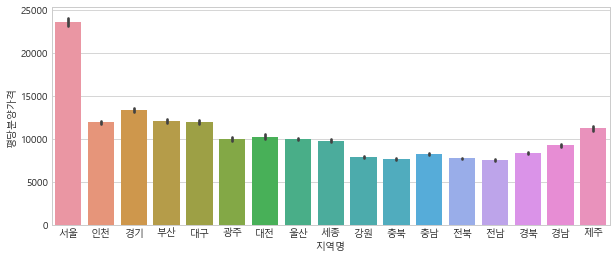

In [115]:
# barplot으로 지역별 평당분양가격을 그려봅니다.
plt.figure(figsize = (10,4))
sns.barplot(data=df_last, x='지역명', y='평당분양가격')

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

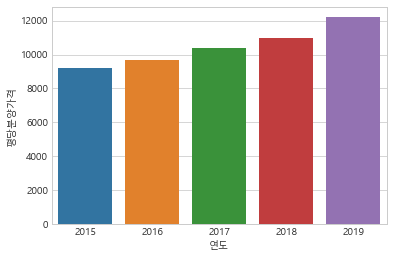

In [116]:
# barplot으로 연도별 평당분양가격을 그려봅니다.

sns.barplot(data= df_last, x= '연도', y='평당분양가격', ci=None )

### - catplot
* stripplot, swarmplot, boxplot, violinplotm, pointplot, barplot

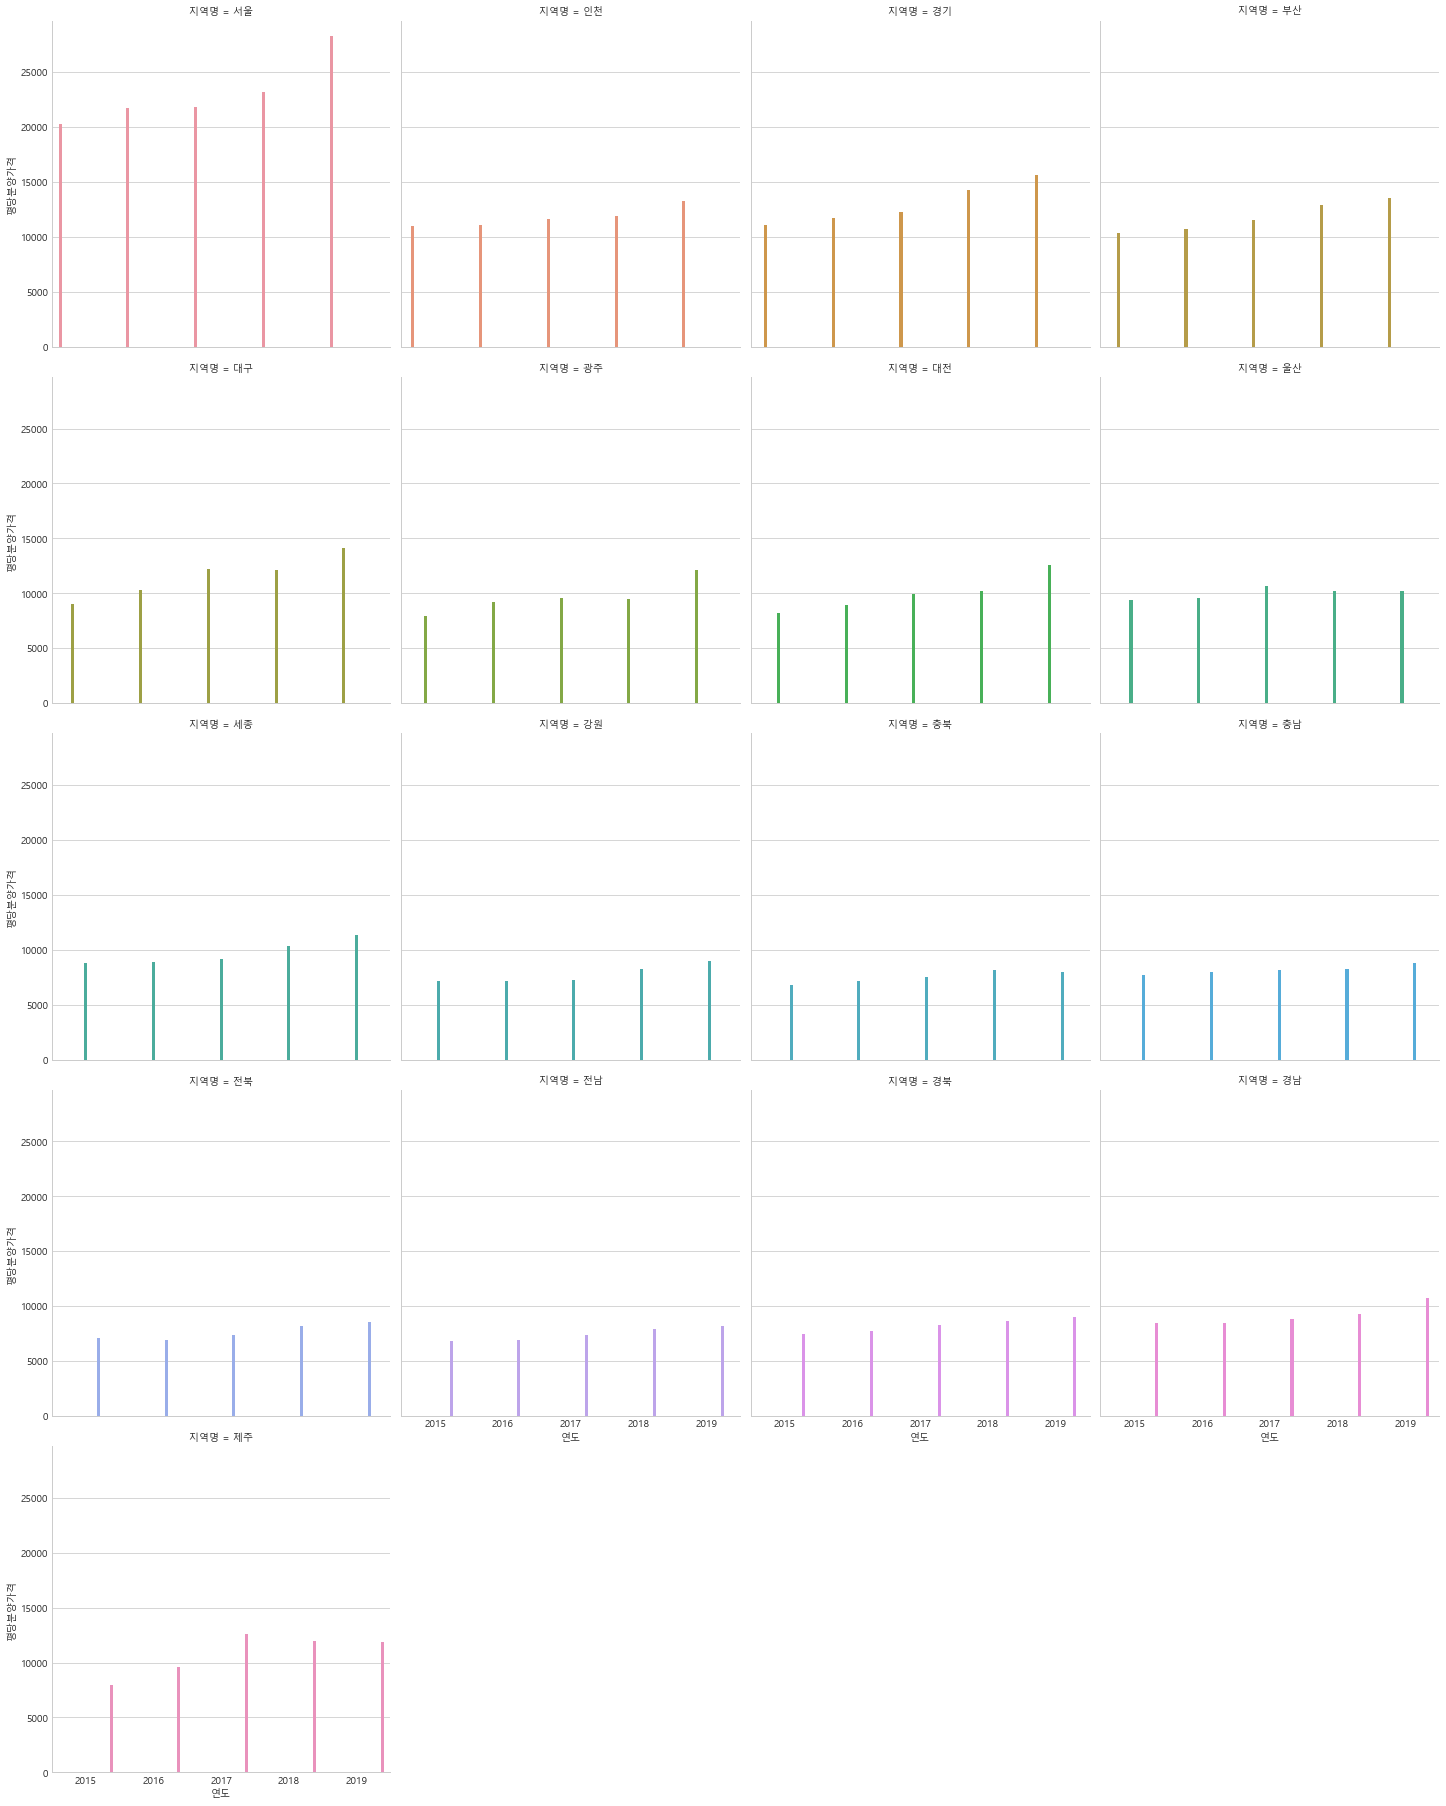

In [122]:
# 연도별 평균 평당분양가격 구하기
# catplot 으로 서브플롯 그리기

sns.catplot(data= df_last, x= '연도', y='평당분양가격', kind = 'bar', ci=None, hue='지역명', col= '지역명', col_wrap=4)

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

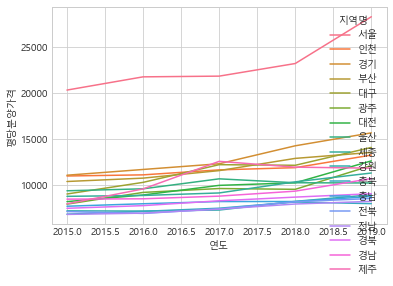

In [123]:
# lineplot으로 연도별 평당분양가격을 그려봅니다.
# hue 옵션을 통해 지역별로 다르게 표시해 봅니다.

sns.lineplot(data= df_last, x= '연도', y='평당분양가격',hue='지역명', ci=None)

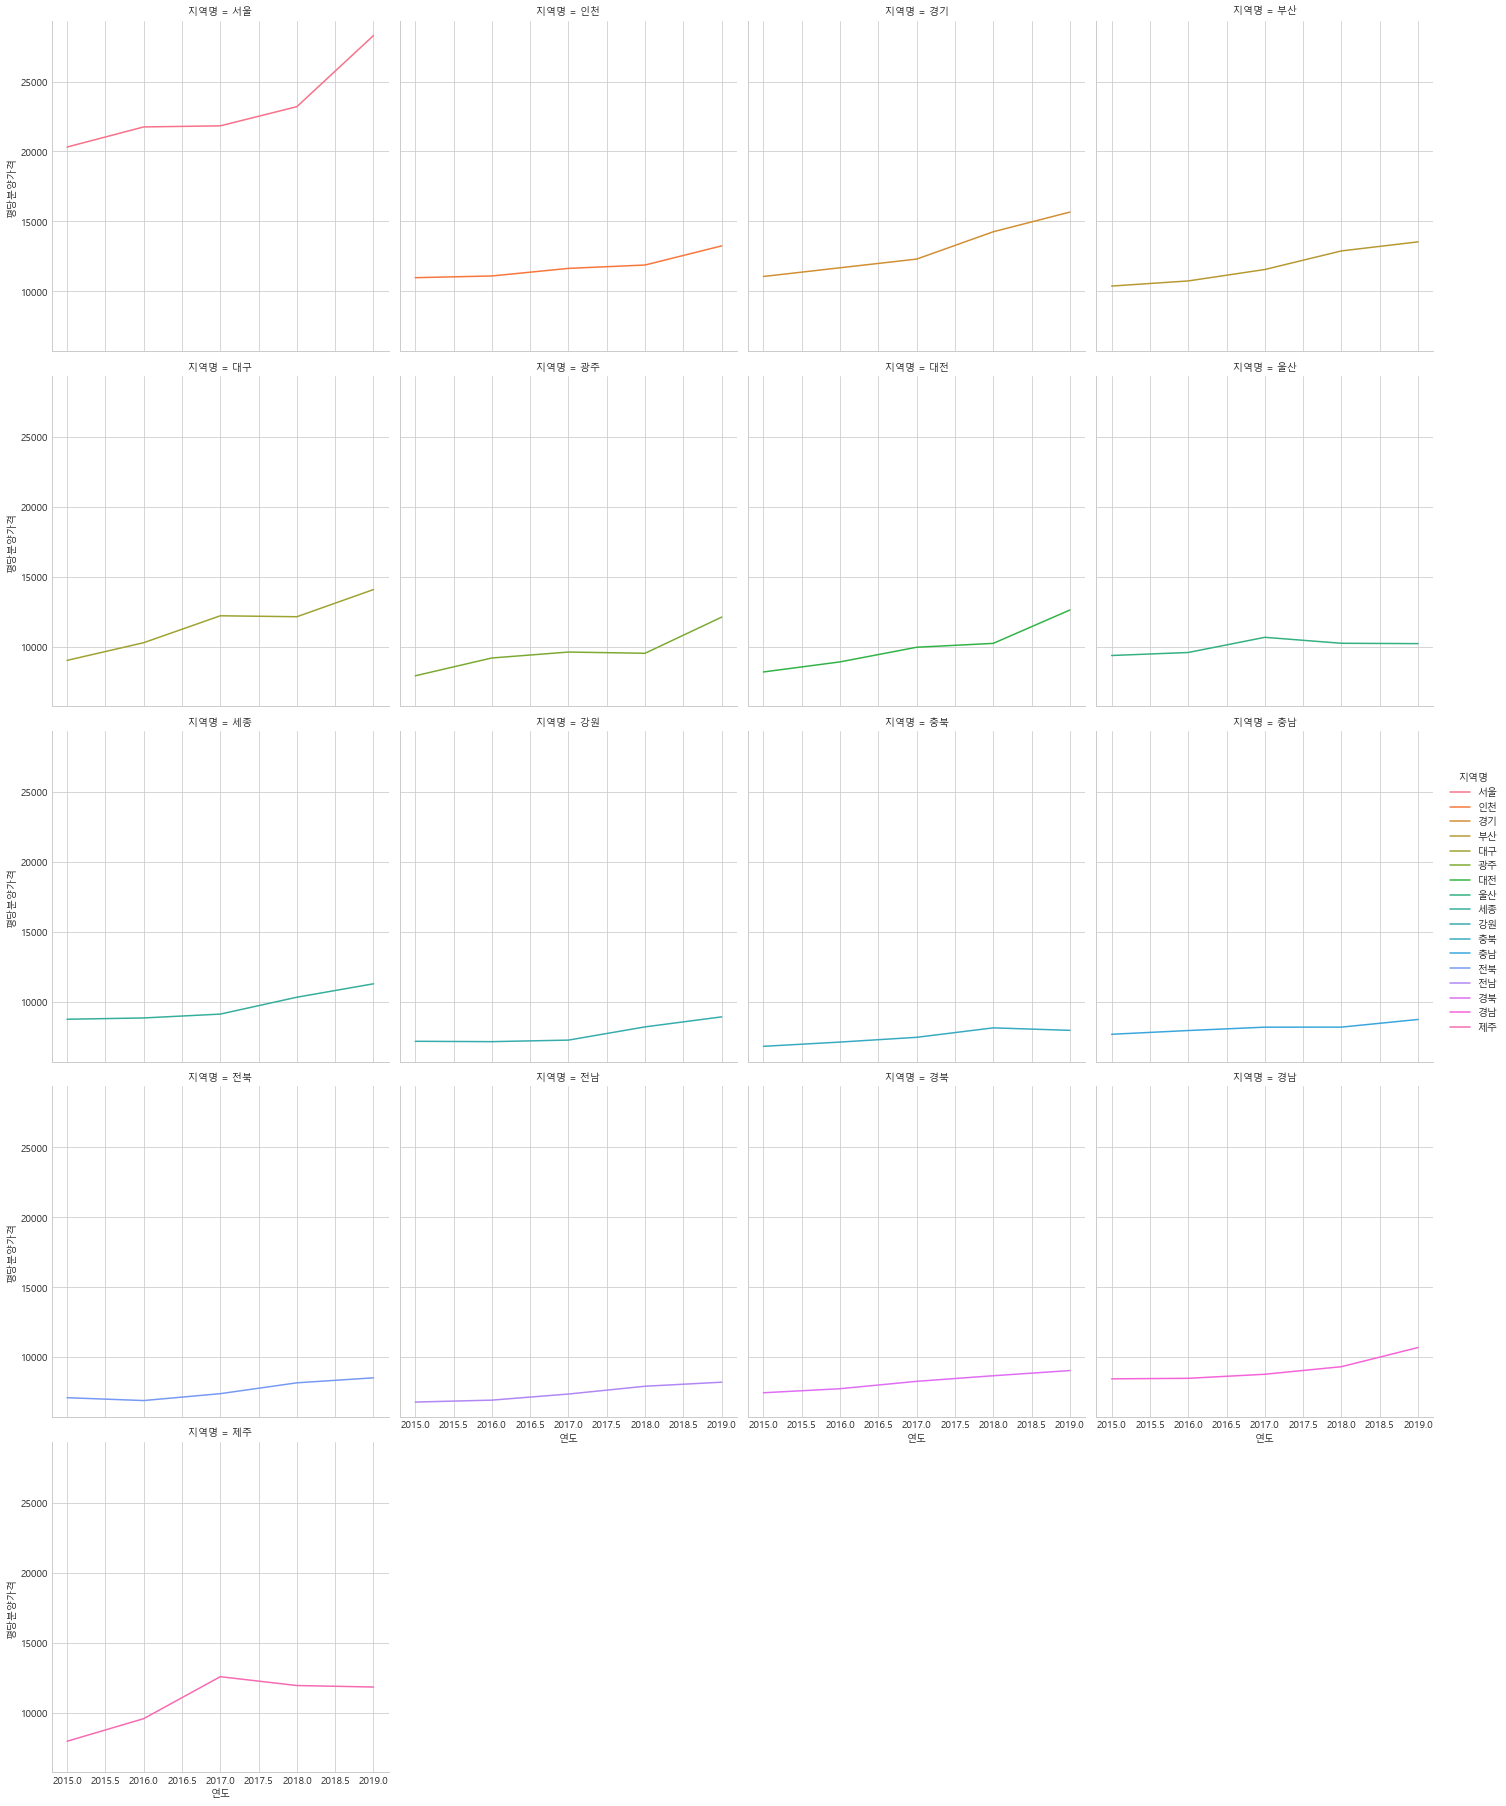

In [124]:
# 연도별 평균 평당분양가격 구하기
# relplot 으로 서브플롯 그리기

sns.relplot(data= df_last, x= '연도', y='평당분양가격',ci=None, kind = 'line', col='지역명',col_wrap=4, hue='지역명')

### boxplot과 violinplot

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

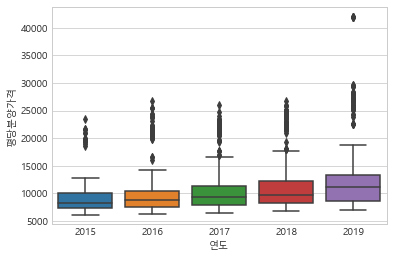

In [125]:
# 연도별 평당분양가격을 boxplot으로 그려봅니다.
# 최솟값
# 제 1사분위수
# 제 2사분위수, 즉 중앙값
# 제 3 사분위 수
# 최댓값

sns.boxplot(data=df_last, x='연도', y='평당분양가격')

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

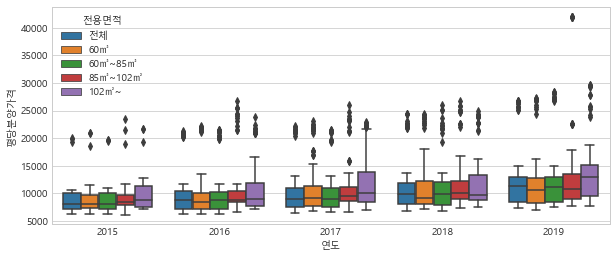

In [126]:
# hue옵션을 주어 전용면적별로 다르게 표시해 봅니다.
plt.figure(figsize=(10,4))
sns.boxplot(data=df_last, x='연도', y='평당분양가격', hue='전용면적')

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

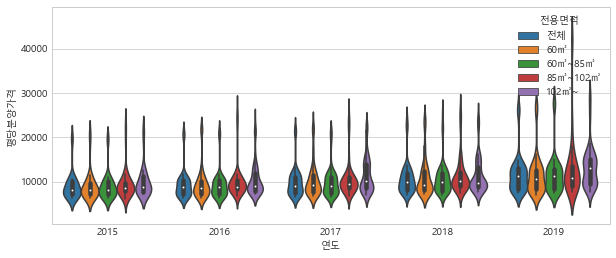

In [130]:
# 연도별 평당분양가격을 violinplot으로 그려봅니다.
plt.figure(figsize=(10,4))
sns.violinplot(data=df_last, x='연도', y='평당분양가격', hue='전용면적')

### lmplot과 swarmplot 

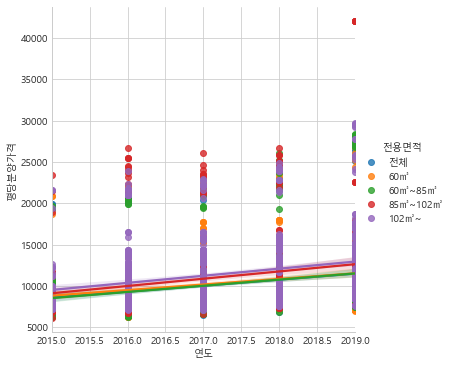

In [132]:
# 연도별 평당분양가격을 lmplot으로 그려봅니다. 
# hue 옵션으로 전용면적을 표현해 봅니다.

sns.lmplot(data=df_last, x='연도', y='평당분양가격', hue='전용면적')

# 적당하지 않은 그래프임

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

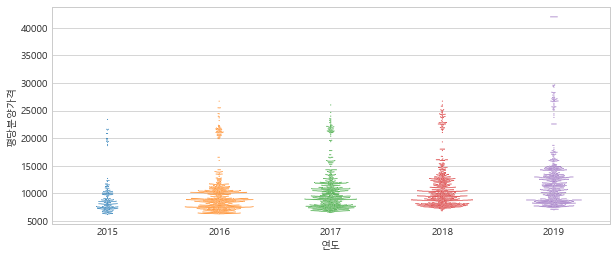

In [133]:
# 연도별 평당분양가격을 swarmplot 으로 그려봅니다. 
plt.figure(figsize= (10,4))
sns.swarmplot(data=df_last, x='연도', y='평당분양가격', size=1)

### 이상치 보기

In [134]:
# 서울의 평당분양가격이 특히 높은 데이터가 있습니다. 해당 데이터를 가져옵니다.

df_last[df_last['평당분양가격']>40000]

,지역명,규모구분,연도,월,평당분양가격,전용면적
3743,서울,전용면적 85㎡초과 102㎡이하,2019,6,42002.4,85㎡~102㎡
3828,서울,전용면적 85㎡초과 102㎡이하,2019,7,42002.4,85㎡~102㎡
3913,서울,전용면적 85㎡초과 102㎡이하,2019,8,42002.4,85㎡~102㎡
3998,서울,전용면적 85㎡초과 102㎡이하,2019,9,42002.4,85㎡~102㎡
4083,서울,전용면적 85㎡초과 102㎡이하,2019,10,42002.4,85㎡~102㎡
4168,서울,전용면적 85㎡초과 102㎡이하,2019,11,42002.4,85㎡~102㎡
4253,서울,전용면적 85㎡초과 102㎡이하,2019,12,42002.4,85㎡~102㎡


### pairplot

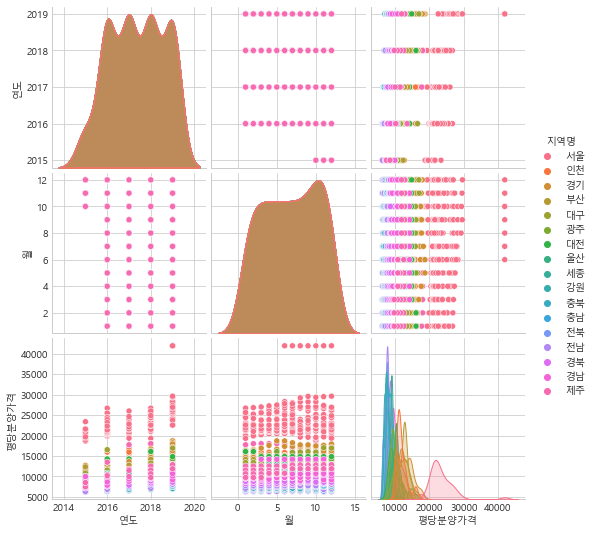

In [149]:
# pairplot
# 수치형 데이터의 시각화

sns.pairplot(data=df_last, hue='지역명')

# **4. [df_first 데이터 보기]**

In [ ]:
# 모든 컬럼이 출력되게 설정합니다.
# pd.options.display.max_columns =None

# => 모든 열을 보일 수 있게 가져온다
# => but 비추한다. 판다스에 무리를 주기 때문에 비추 

# 전처리

In [143]:
# head 로 미리보기를 합니다.
df_first.head(3)

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,...,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,...,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795


In [144]:
# df_first 변수에 담겨있는 데이터프레임의 정보를 info를 통해 봅니다.

df_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   지역        17 non-null     object
 1   2013년12월  17 non-null     int64 
 2   2014년1월   17 non-null     int64 
 3   2014년2월   17 non-null     int64 
 4   2014년3월   17 non-null     int64 
 5   2014년4월   17 non-null     int64 
 6   2014년5월   17 non-null     int64 
 7   2014년6월   17 non-null     int64 
 8   2014년7월   17 non-null     int64 
 9   2014년8월   17 non-null     int64 
 10  2014년9월   17 non-null     int64 
 11  2014년10월  17 non-null     int64 
 12  2014년11월  17 non-null     int64 
 13  2014년12월  17 non-null     int64 
 14  2015년1월   17 non-null     int64 
 15  2015년2월   17 non-null     int64 
 16  2015년3월   17 non-null     int64 
 17  2015년4월   17 non-null     int64 
 18  2015년5월   17 non-null     int64 
 19  2015년6월   17 non-null     int64 
 20  2015년7월   17 non-null     int64 
 21  2015년8월   17 non-n

In [145]:
# 결측치가 있는지 봅니다.

df_first.isnull().sum()

지역          0
2013년12월    0
2014년1월     0
2014년2월     0
2014년3월     0
2014년4월     0
2014년5월     0
2014년6월     0
2014년7월     0
2014년8월     0
2014년9월     0
2014년10월    0
2014년11월    0
2014년12월    0
2015년1월     0
2015년2월     0
2015년3월     0
2015년4월     0
2015년5월     0
2015년6월     0
2015년7월     0
2015년8월     0
dtype: int64

## melt로 Tidy data 만들기
df_first 변수에 담긴 데이터프레임은 df_last에 담겨있는 데이터프레임의 모습과 다릅니다. 
같은 형태로 만들어주어야 데이터를 합칠 수 있습니다. 

* melt : 열을 각각의 해으로 ...

In [146]:
# head 로 미리보기 합니다.
df_first.head(1)

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443


In [147]:
# pd.melt 를 사용하며, 녹인 데이터는 df_first_melt 변수에 담습니다. 
df_first_melt = pd.melt(df_first, id_vars='지역')
df_first_melt.head()

,지역,variable,value
0,서울,2013년12월,18189
1,부산,2013년12월,8111
2,대구,2013년12월,8080
3,인천,2013년12월,10204
4,광주,2013년12월,6098


In [148]:
# df_first_melt 변수에 담겨진 컬럼의 이름을 
# ["지역명", "기간", "평당분양가격"] 으로 변경합니다.

df_first_melt.columns = ['지역명', '기간', '평당분양가격']
df_first_melt.head()

,지역명,기간,평당분양가격
0,서울,2013년12월,18189
1,부산,2013년12월,8111
2,대구,2013년12월,8080
3,인천,2013년12월,10204
4,광주,2013년12월,6098


## 연도와 월을 분리하기
* pandas 의 string-handling 사용하기 : https://pandas.pydata.org/pandas-docs/stable/reference/series.html#string-handling

In [150]:
date = "2013년12월"
print(date)
type(date)

# => str은 파이썬의 데이터 타입이다.

2013년12월


str

In [151]:
type(df_last)
# => dataframe 타입은 판다스 타입이다.
# => data를 판다스 라이브러리르 불러 왔기 때문

pandas.core.frame.DataFrame

In [152]:
# split 을 통해 "년"을 기준으로 텍스트를 분리해 봅니다.

date.split('년')

['2013', '12월']

In [157]:
# 리스트의 인덱싱을 사용해서 연도만 가져옵니다.

type(date.split('년')[0])

str

In [154]:
# 리스트의 인덱싱과 replace를 사용해서 월을 제거합니다.

date.split('년')[1].replace('월','')

# => 판다스의 문자열 타입이기 때문에 앞에 str. 안 붙여주어도 된다.
# => 판다스와는 다르게 일부 문자만 일치해도 변경해줌 

'12'

### 연도만 반환하는 함수 만들기

In [158]:
# parse_year라는 함수를 만듭니다.
# 연도만 반환하도록 하며, 반환하는 데이터는 int 타입이 되도록 합니다.
# => int로 바꿔주는 이유는 df_last 의 연도 타입이 int 이기 때문에 합쳐주기 위해 같은 타입으로 바꾼다.

def parse_year(date):
    year = date.split('년')[0]
    year = int(year)
    return year

In [208]:
# 제대로 분리가 되었는지 parse_year 함수를 확인합니다.
print(parse_year(date))
type(parse_year(date))

2013


int

### 월만 반환하는 함수 만들기

In [163]:
# parse_month 라는 함수를 만듭니다.
# 월만 반환하도록 하며, 반환하는 데이터는 int 타입이 되도록 합니다.
def parse_month(date):
    month = date.split('년')[1].replace('월', '')
    month = int(month)
    return month

In [164]:
# 제대로 분리가 되었는지 parse_month 함수를 확인합니다.

parse_month(date)

12

In [167]:
# df_first_melt 변수에 담긴 데이터프레임에서 
# apply를 활용해 연도만 추출해서 새로운 컬럼에 담습니다.

df_first_melt['연도'] = df_first_melt['기간'].apply(parse_year)
df_first_melt.head(3)

,지역명,기간,평당분양가격,연도
0,서울,2013년12월,18189,2013
1,부산,2013년12월,8111,2013
2,대구,2013년12월,8080,2013


In [168]:
# df_first_melt 변수에 담긴 데이터프레임에서 
# apply를 활용해 월만 추출해서 새로운 컬럼에 담습니다.

df_first_melt['월'] = df_first_melt['기간'].apply(parse_month)
df_first_melt.head(1)

,지역명,기간,평당분양가격,연도,월
0,서울,2013년12월,18189,2013,12


In [170]:
# 컬럼명을 리스트로 만들때 버전에 따라 tolist() 로 동작하기도 합니다.
# to_list() 가 동작하지 않는다면 tolist() 로 해보세요.

df_first_melt.columns.to_list()

['지역명', '기간', '평당분양가격', '연도', '월']

In [173]:
# df_last와 병합을 하기 위해서는 컬럼의 이름이 같아야 합니다.
# sample을 활용해서 데이터를 미리보기 합니다.

df_last.head(2)

,지역명,규모구분,연도,월,평당분양가격,전용면적
0,서울,전체,2015,10,19275.3,전체
1,서울,전용면적 60㎡이하,2015,10,18651.6,60㎡


In [174]:
cols = ['지역명', '연도', '월', '평당분양가격']
cols

['지역명', '연도', '월', '평당분양가격']

In [176]:
# 최근 데이터가 담긴 df_last 에는 전용면적이 있습니다. 
# 이전 데이터에는 전용면적이 없기 때문에 "전체"만 사용하도록 합니다.
# loc를 사용해서 전체에 해당하는 면적만 copy로 복사해서 df_last_prepare 변수에 담습니다.

df_last_prepare = df_last.loc[df_last['전용면적'] == '전체', cols]
df_last_prepare.head(3)

,지역명,연도,월,평당분양가격
0,서울,2015,10,19275.3
5,인천,2015,10,10437.9
10,경기,2015,10,10355.4


In [178]:
# df_first_melt에서 공통된 컬럼만 가져온 뒤
# copy로 복사해서 df_first_prepare 변수에 담습니다.

df_first_prepare = df_first_melt[cols]
df_first_prepare.head(3)

,지역명,연도,월,평당분양가격
0,서울,2013,12,18189
1,부산,2013,12,8111
2,대구,2013,12,8080


# 5. concat 으로 2개의 데이터 합치기
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html

In [179]:
# df_first_prepare 와 df_last_prepare 를 합쳐줍니다.
df = pd.concat([df_first_prepare, df_last_prepare])
df.shape

(1224, 4)

In [180]:
# 제대로 합쳐졌는지 미리보기를 합니다.

df.head(3)

,지역명,연도,월,평당분양가격
0,서울,2013,12,18189.0
1,부산,2013,12,8111.0
2,대구,2013,12,8080.0


In [181]:
df.tail(3)

,지역명,연도,월,평당분양가격
4320,경북,2019,12,9616.2
4325,경남,2019,12,10107.9
4330,제주,2019,12,12810.6


In [182]:
# 연도별로 데이터가 몇개씩 있는지 value_counts를 통해 세어봅니다.

df['연도'].value_counts()

2014    204
2016    204
2017    204
2018    204
2019    204
2015    187
2013     17
Name: 연도, dtype: int64

# 집계 및 시각화

## pivot table로 데이터 집계하기
* https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-and-pivot-tables

### 연도별, 지역명별 펴육ㄴ 평당분양가격

In [185]:
# 연도를 인덱스로, 지역명을 컬럼으로 평당분양가격을 피봇테이블로 그려봅니다.
# df.pivot_tabe 로 해도됨 => 이 경우 data 지정 안해줘도 된다.

g = pd.pivot_table(data = df, index= '연도', columns = '지역명', values= '평당분양가격')
g
g.astype(int).style.background_gradient()

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,
2013,6230,10855,6473,6168,6098,8080,8321,8111,18189,7601,8090,10204,5678,6282,7674,6365,6589
2014,6332,10509,6728,6536,7587,8286,8240,9180,18997,8085,8361,10074,5718,6362,7855,6681,6620
2015,6831,10489,7646,7035,7956,8706,8104,9633,19282,8641,9273,10276,6109,6623,7465,7024,6699
2016,7011,11220,7847,7360,8898,10310,8501,10429,20663,8860,10208,10532,6488,6417,9129,7330,6770
2017,7126,11849,8119,7794,9463,11455,9044,11577,21375,9135,11345,10736,7187,7057,10830,7456,6762
2018,7680,13185,9019,8505,9855,12075,10180,12997,22889,10354,10241,11273,7789,7625,11890,8012,7874
2019,8141,14468,9870,8856,11822,13852,11777,13116,26131,11078,10022,12634,7902,8196,12137,8606,7574


<AxesSubplot:xlabel='지역명', ylabel='연도'>

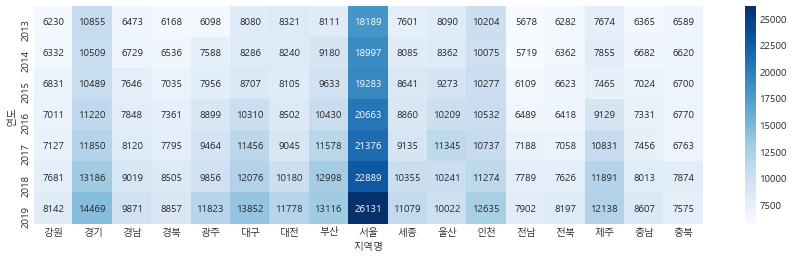

In [187]:
# 위에서 그린 피봇테이블을 히트맵으로 표현해 봅니다.
plt.figure(figsize = (15,4))
sns.heatmap(data = g, annot=True, cmap ='Blues',fmt='.0f')

<AxesSubplot:xlabel='연도', ylabel='지역명'>

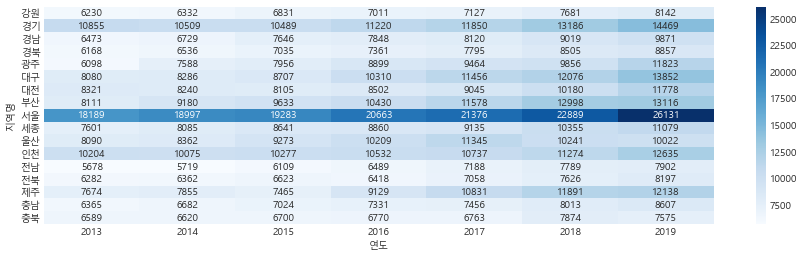

In [191]:
# transpose 를 사용하면 행과 열을 바꿔줄 수 있습니다.
# or .T 해도 됨
plt.figure(figsize= (15,4))
sns.heatmap(data = g.T, annot=True, cmap ='Blues',fmt='.0f')

In [192]:
# background 와 heatmap 차이 ★

# background_gradient : 각 컬럼 별(각 시리즈) 데이터 안에서 가장 높은 값을 가장 진해게 표현
# heatmap : 전체 데이터 안에서 가장 높은 값을 진하게 표현

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

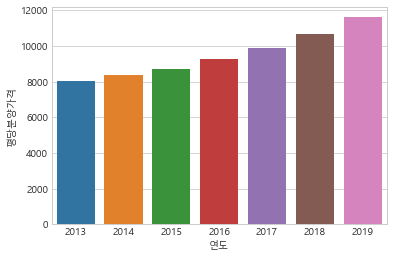

In [194]:
# barplot 으로 연도별 평당분양가격 그리기
# sd : 표준편차
sns.barplot(data =df , x='연도', y='평당분양가격', ci=None)

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

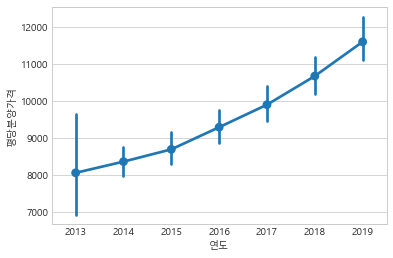

In [195]:
# pointplot 으로 연도별 평당분양가격 그리기
sns.pointplot(data =df , x='연도', y='평당분양가격')

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

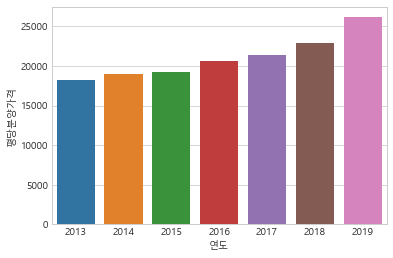

In [197]:
# 서울만 barplot 으로 그리기
sns.barplot(data =df[df['지역명']=='서울'] , x='연도', y='평당분양가격', ci=None)

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

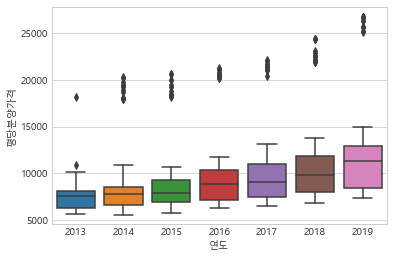

In [198]:
# 연도별 평당분양가격 boxplot 그리기
sns.boxplot(data =df , x='연도', y='평당분양가격')

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

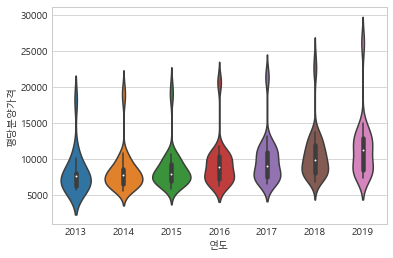

In [199]:
# 연도별 평당분양가격 violinplot 그리기

sns.violinplot(data =df , x='연도', y='평당분양가격')

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

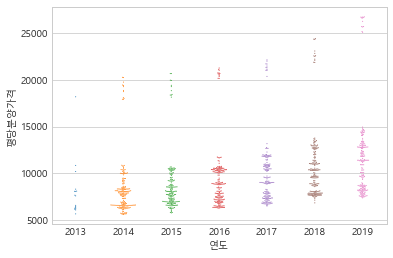

In [200]:
# 연도별 평당분양가격 swarmplot 그리기
# 여기서 size 는 점의 크기이다.

sns.swarmplot(data =df , x='연도', y='평당분양가격', size = 1)

### 지역별 평당분양가격 보기

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

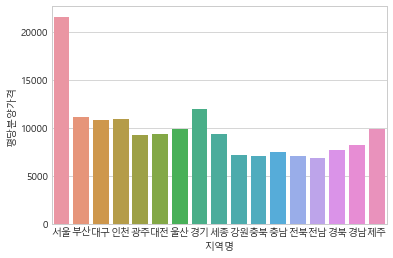

In [202]:
sns.barplot(data =df, x='지역명', y='평당분양가격', ci=None)

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

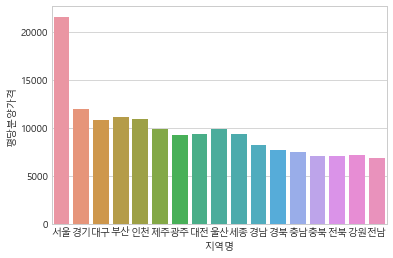

In [204]:
# barplot 으로 지역별 평당분양가격을 그려봅니다.

sns.barplot(data =df.sort_values('평당분양가격', ascending = False) , x='지역명', y='평당분양가격',ci=None)

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

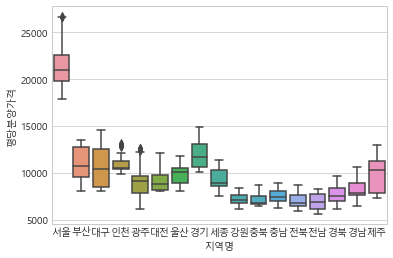

In [205]:
# boxplot 으로 지역별 평당분양가격을 그려봅니다.
sns.boxplot(data =df , x='지역명', y='평당분양가격')

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

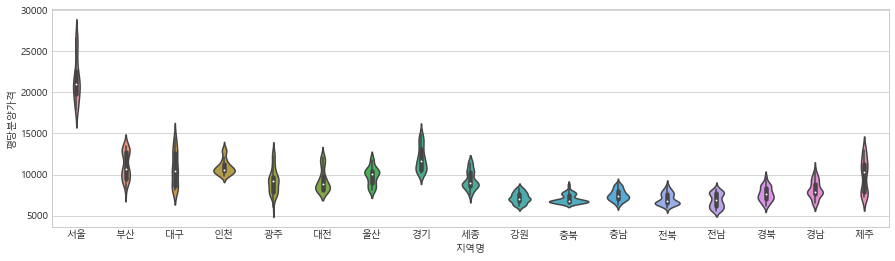

In [206]:
# violinplot 으로 지역별 평당분양가격을 그려봅니다.
plt.figure(figsize = (15,4))
sns.violinplot(data =df , x='지역명', y='평당분양가격')

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

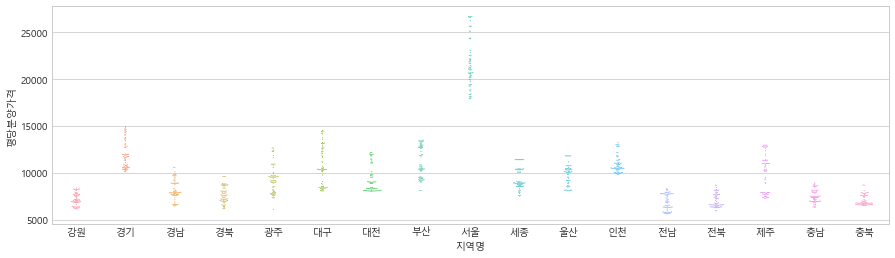

In [207]:
# swarmplot 으로 지역별 평당분양가격을 그려봅니다.
plt.figure(figsize = (15,4))
sns.swarmplot(data =df.sort_values('지역명') , x='지역명', y='평당분양가격', size = 1)